### Predict the value of Profit 
#### Data Set = 50startups.csv

Dataset from github

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
## Let profit be the output variable
X = df.iloc[:,:-1]
y = df.iloc[:, 4]

X.head()


,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [5]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

<AxesSubplot:>

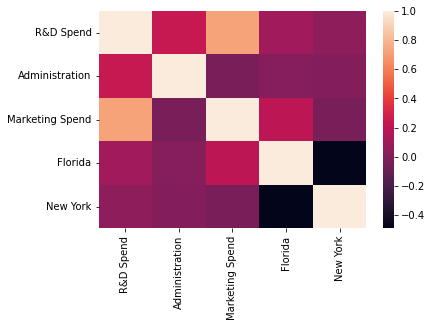

In [27]:
correlation = X.corr()

import seaborn as sns
sns.heatmap(correlation)

In [6]:
state = pd.get_dummies(X['State'],drop_first=True)

In [7]:
state.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [8]:
X = X.drop('State',axis = 1)

In [9]:
X = pd.concat([X,state],axis = 1)

In [10]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0) 

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = regressor.predict(X_test)

In [18]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

c:\users\lalith\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

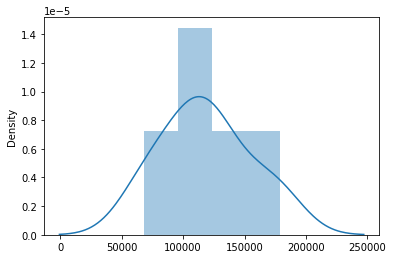

In [30]:
sns.distplot(y_pred)

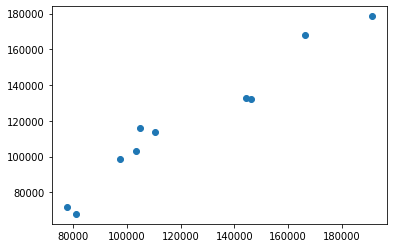

In [31]:
plt.scatter(y_test,y_pred)

### Accuracy

In [23]:
from sklearn.metrics import r2_score

In [24]:
score = r2_score(y_test,y_pred)
score

0.9347068473282423

In [ ]:
### The model gives the good accuracy